In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data_A = pd.read_csv('[Daytime]A.csv')
data_B = pd.read_csv('[Daytime]B.csv')
data_A.drop(columns=['Unnamed: 0'],inplace=True)
data_B.drop(columns=['Unnamed: 0'],inplace=True)
data_A['date'] = pd.to_datetime(data_A['date'])
data_B['date'] = pd.to_datetime(data_B['date'])


In [17]:
def permutation_test(treatment, control, metrics):
    treatment = np.array(treatment)
    control = np.array(control)
    observed_diff = np.mean(treatment) - np.mean(control)
    
    combined = np.concatenate([treatment, control])
    perm_diff = []
    for i in range(10000):
        np.random.shuffle(combined)
        new_treatment = combined[:len(treatment)]
        new_control = combined[len(treatment):]
        perm_diff.append(np.mean(new_treatment) - np.mean(new_control))
    
    p_val = (np.sum(np.abs(perm_diff) >= np.abs(observed_diff)) + 1) / (len(perm_diff) + 1)



    return p_val, perm_diff, observed_diff



p-value = 0.1414. There is no significant difference in batch_requests/sec.
p-value = 0.8304. There is no significant difference in disk_avg_read_time_1.
p-value = 0.7743. There is no significant difference in disk_avg_read_time_2.
p-value = 0.7631. There is no significant difference in index1.
p-value = 0.8808. There is no significant difference in disk_avg_write_time_1.
p-value = 0.6870. There is no significant difference in disk_avg_write_time_2.
p-value = 0.5468. There is no significant difference in index2.
p-value = 0.5683. There is no significant difference in compilations/batch.
p-value = 0.7569. There is no significant difference in disk_avg_read_time_sql_data.
p-value = 0.0001. There is a significant difference in user_connections.
p-value = 0.0001. There is a significant difference in processor_time.
p-value = 0.0001. There is a significant difference in free_memory.
p-value = 0.0079. There is a significant difference in page_reads/sec.
p-value = 0.0001. There is a significa

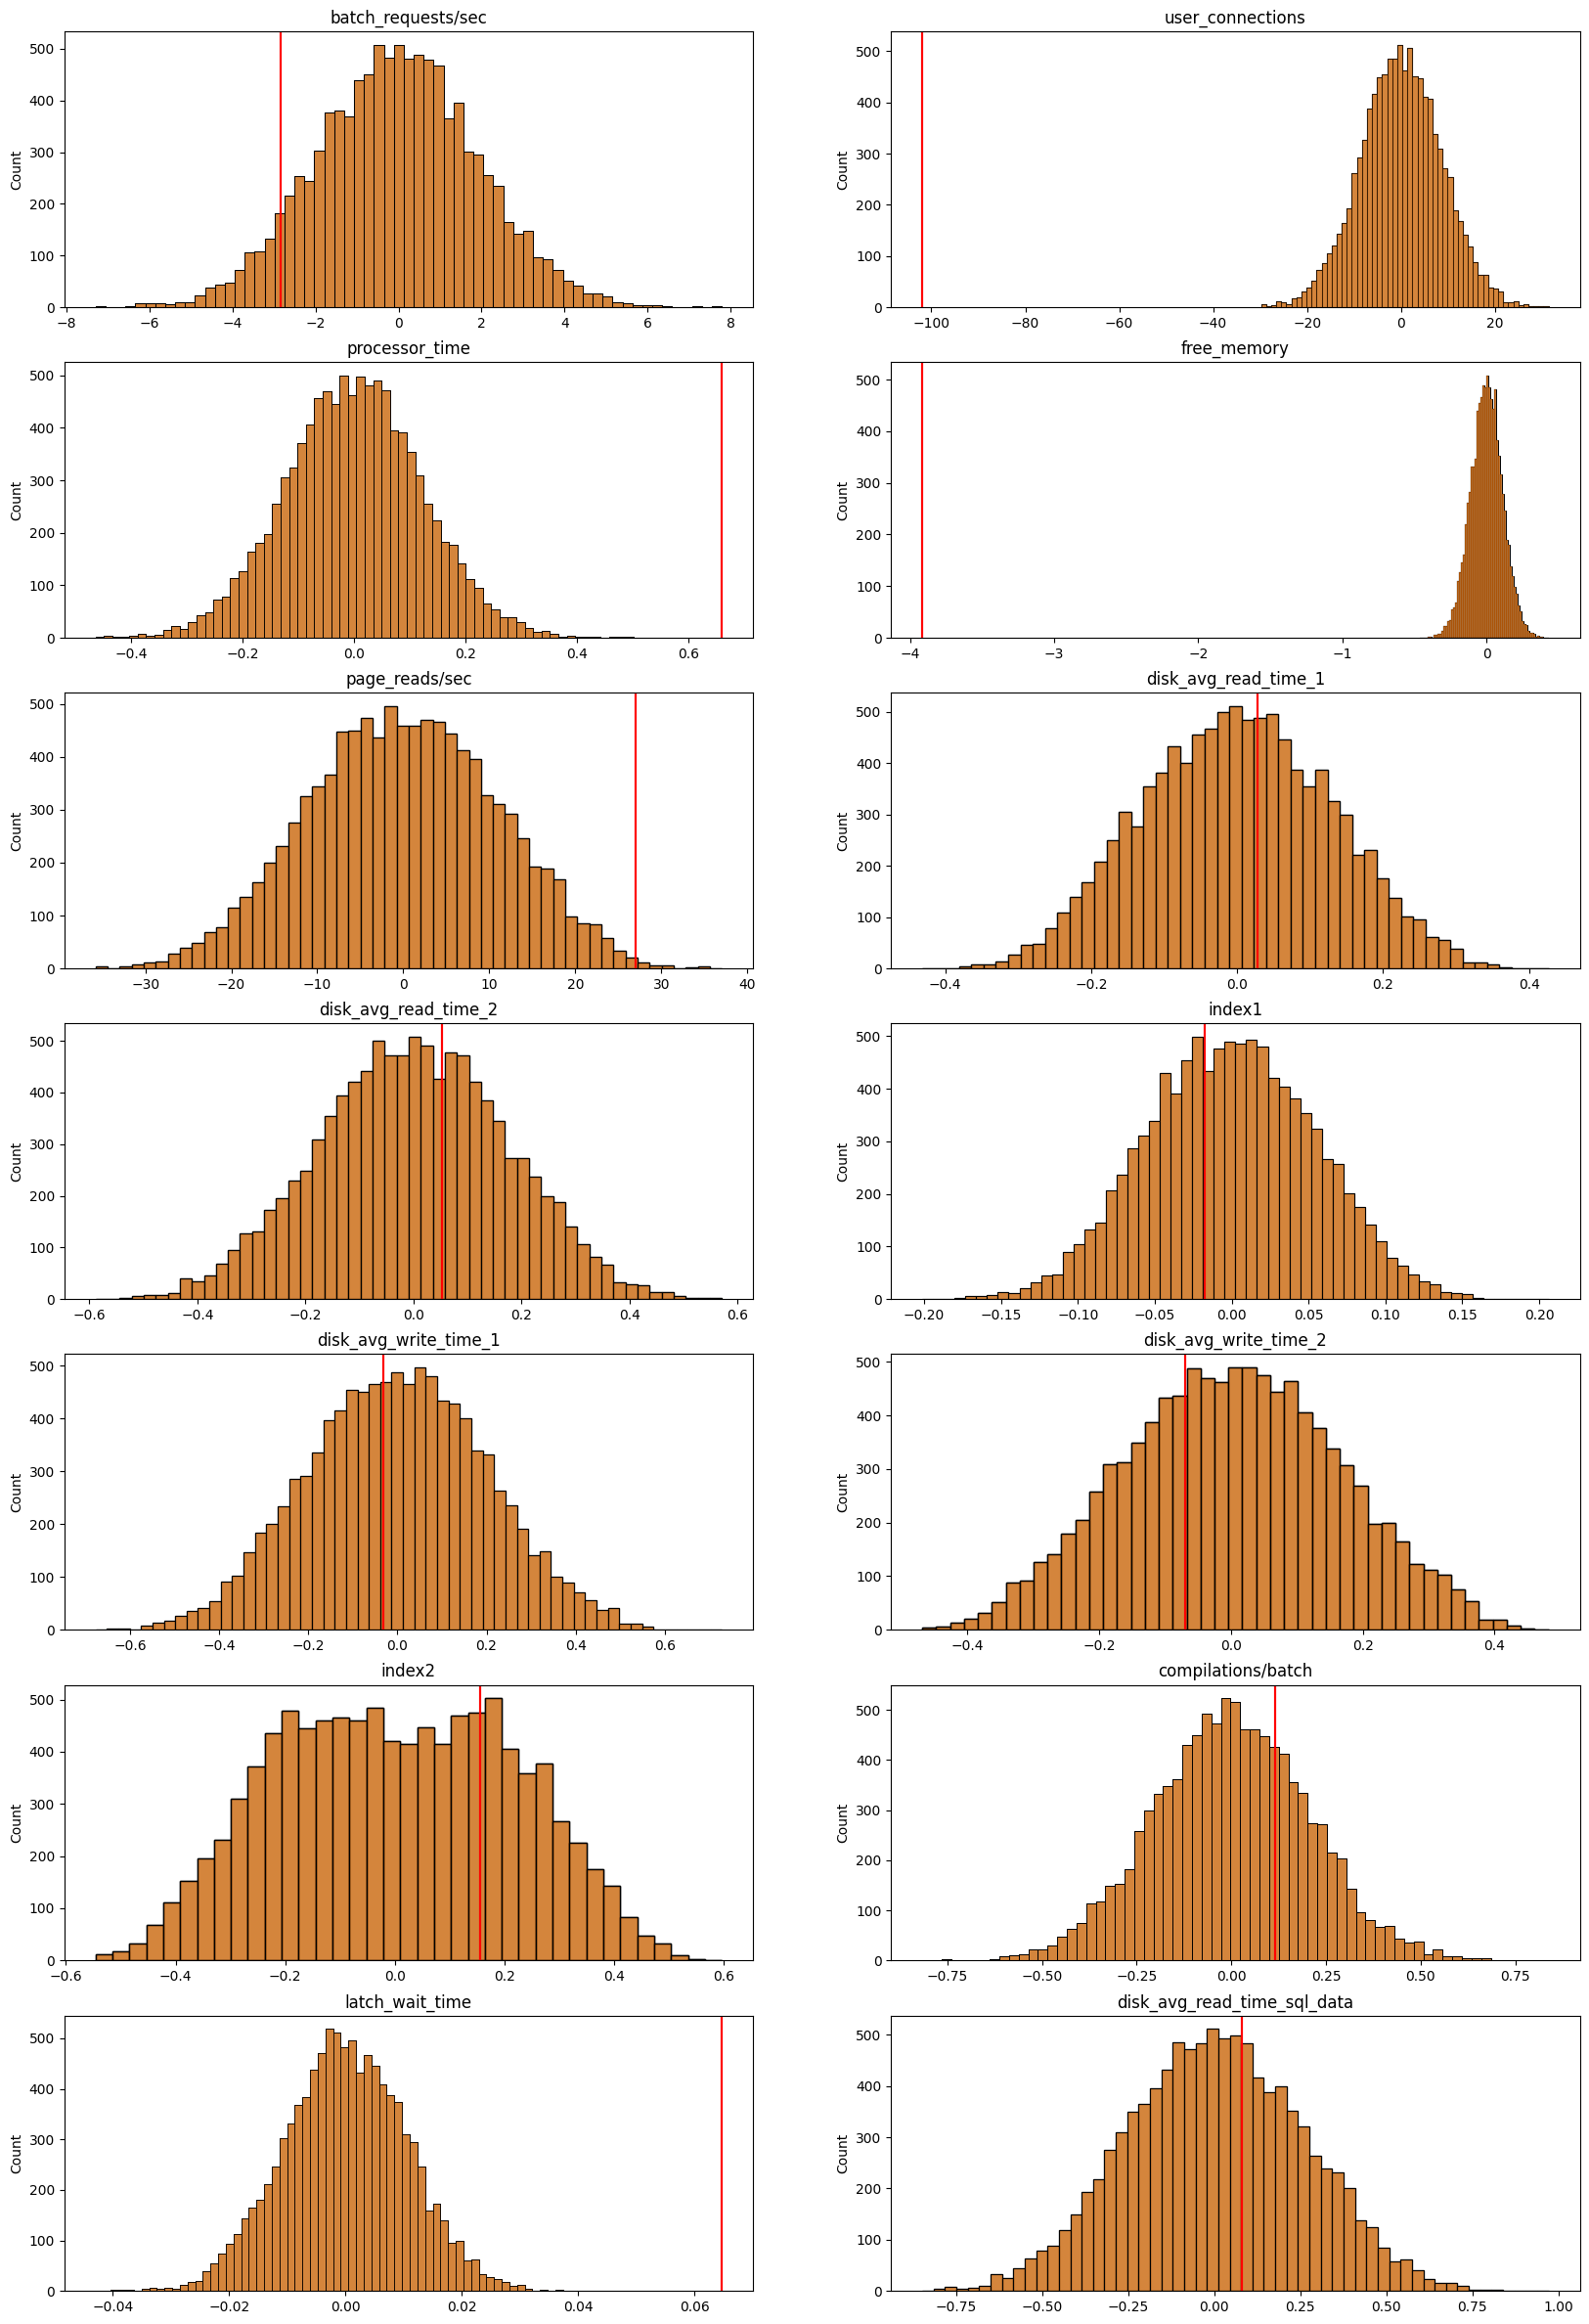

In [20]:
fig, axes = plt.subplots(nrows= 7, ncols=2, figsize= (20, 30))
axes = axes.flatten()
sig = []
non_sig = []
for i in range (1, len(data_A.columns)):
    p_val, perm_list, observed = permutation_test(data_A[data_A.columns[i]].dropna(), data_B[data_A.columns[i]].dropna(), data_A.columns[i])
    sns.histplot(data = perm_list, ax = axes[i-1])
    axes[i-1].axvline(x = observed, color = 'r')
    axes[i-1].set_title(data_A.columns[i])
    sns.histplot(data = perm_list, ax = axes[i-1])
    axes[i-1].axvline(x = observed, color = 'r')
    axes[i-1].set_title(data_A.columns[i])
    if p_val > 0.05:
            sig.append((data_A.columns[i], p_val))
    else:
            non_sig.append((data_A.columns[i], p_val))
for significant in sig:
        print(f"p-value = {significant[1]:.4f}. There is no significant difference in {significant[0]}.")
for non_significant in non_sig:
        print(f"p-value = {non_significant[1]:.4f}. There is a significant difference in {non_significant[0]}.")
